**Árboles de decisión**

In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

**1. Análisis del Dataset**

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Documents/Dataset tarea 3/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**2. Verificar valores nulos**

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

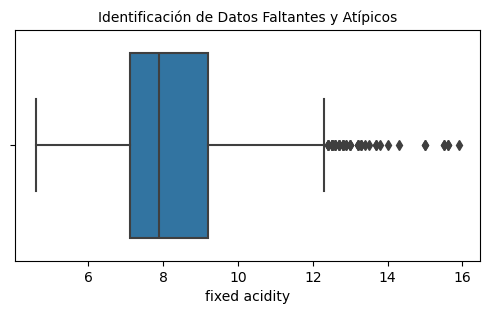

In [25]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['fixed acidity'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [28]:
#Conteo de Datos Atípicos

nivel_minimo=3
nivel_maximo=14
Total_Atipicos=((data['fixed acidity']<nivel_minimo)|(data['fixed acidity']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 8


In [29]:
# Filtra Datos Atípicos

data=data[(data['fixed acidity']<nivel_maximo)&(data['fixed acidity']>nivel_minimo)]

In [30]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((data['fixed acidity']<nivel_minimo)|(data['fixed acidity']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

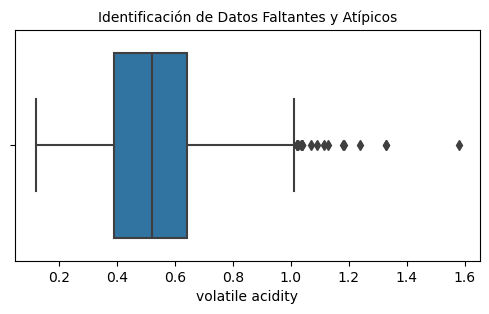

In [31]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['volatile acidity'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [32]:
#Conteo de Datos Atípicos

nivel_minimo=0.1
nivel_maximo=1.3
Total_Atipicos=((data['volatile acidity']<nivel_minimo)|(data['volatile acidity']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [34]:
# Filtra Datos Atípicos

data=data[(data['volatile acidity']<nivel_maximo)&(data['volatile acidity']>nivel_minimo)]

In [35]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((data['volatile acidity']<nivel_minimo)|(data['volatile acidity']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

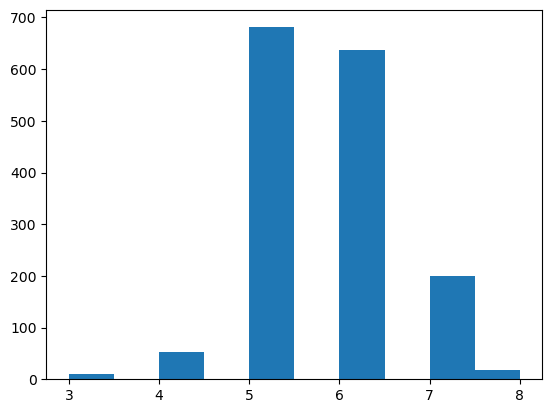

In [7]:
plt.hist(data.quality)

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

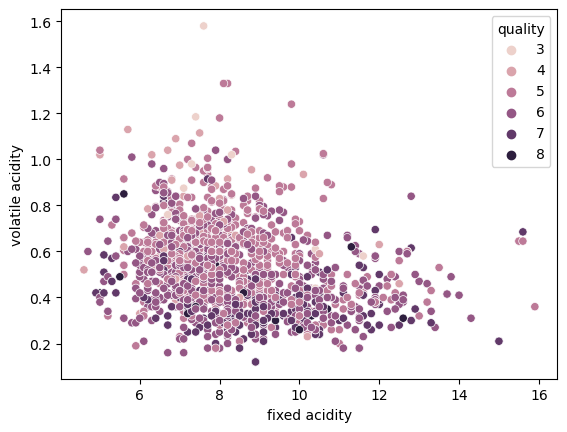

In [8]:
sns.scatterplot(x = "fixed acidity", y = "volatile acidity", hue = "quality", data = data)

**3. Selección de las características más importantes**

In [9]:
#Divide el dataset en columnas 
predictors_col = ["fixed acidity", "citric acid", "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"] 
target_col = ['quality']

In [10]:
predictors = data[predictors_col]
target = data[target_col]

In [11]:
#revisamos las columnas de la variable predictors
predictors

,fixed acidity,citric acid,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.00,0.880,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.04,0.760,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.56,0.280,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.00,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.600,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.10,0.550,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.13,0.510,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.12,0.645,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [13]:
corr = predictors.corr()
corr

,fixed acidity,citric acid,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.671703,-0.256131,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
citric acid,0.671703,1.000000,-0.552496,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
volatile acidity,-0.256131,-0.552496,1.000000,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
residual sugar,0.114777,0.143577,0.001918,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.203823,0.061298,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.060978,-0.010504,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.035533,0.076470,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.364947,0.022026,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,-0.541904,0.234937,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,0.312770,-0.260987,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


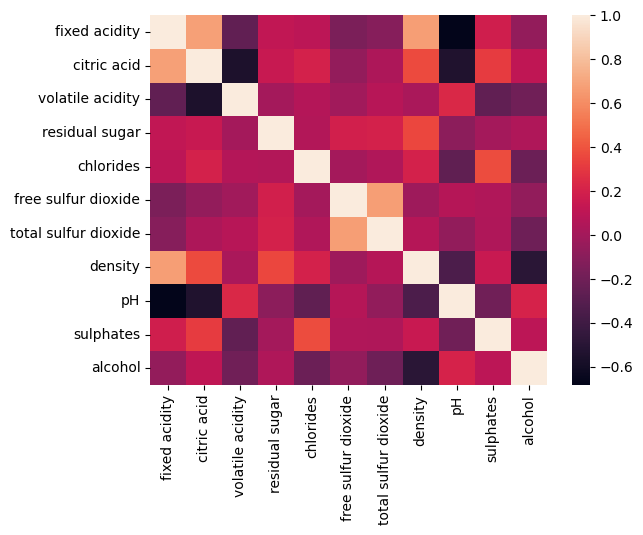

In [14]:
#Mapa de color
sns.heatmap(corr)
plt.show()

In [23]:
correlation = data.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [ ]:
#Podemos observar que el alcohol, sulfatos, ácido_cítrico y acidez_fija tienen máxima correlación con la variable respuesta 'calidad'.
#Esto significa que es necesario analizarlos más a fondo para explorar detalladamente los patrones y las correlaciones. 

**4.Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [15]:
#Asignar un valor de 25% para los datos de test y el 75% restante para los datos de train
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

**5.Entrenar el modelo configurando los diferentes hiperparámetros**

In [16]:
#Crear el árbol de decisión en la variable tree
tree = DecisionTreeClassifier()

In [17]:
#Empieza el entrenamiento el árbol de decisión con los datos de enetrenamiento, se guarda en la variable arbol 
arbol = tree.fit(X_train, y_train)

[Text(0.4881649843694963, 0.9791666666666666, 'x[10] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.23716124735822472, 0.9375, 'x[9] <= 0.535\ngini = 0.542\nsamples = 725\nvalue = [5, 27, 423, 246, 24, 0]'),
 Text(0.0392156862745098, 0.8958333333333334, 'x[2] <= 0.335\ngini = 0.369\nsamples = 173\nvalue = [2, 13, 135, 22, 1, 0]'),
 Text(0.02066455324644828, 0.8541666666666666, 'x[1] <= 0.43\ngini = 0.54\nsamples = 10\nvalue = [0, 1, 3, 6, 0, 0]'),
 Text(0.016907361747094046, 0.8125, 'x[9] <= 0.485\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 3, 1, 0, 0]'),
 Text(0.013150170247739814, 0.7708333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.02066455324644828, 0.7708333333333334, 'x[0] <= 8.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.016907361747094046, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.024421744745802512, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nva

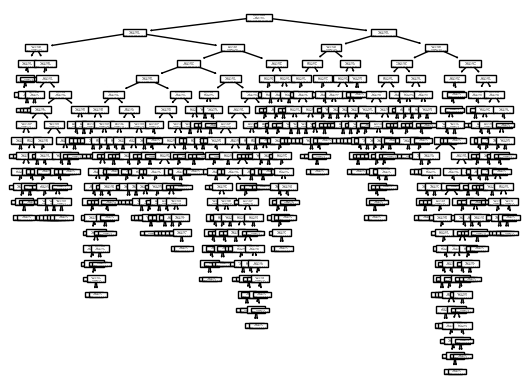

In [18]:
#Imprimir en pantalla el arbol
plot_tree(arbol)

**6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc**

In [19]:
predicciones = arbol.predict(X_test)

In [20]:
predicciones

array([7, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 7, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 6, 6,
       5, 5, 6, 7, 6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 6, 5, 5, 7, 5, 5, 7, 7,
       6, 7, 5, 5, 6, 5, 7, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 6,
       6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 7, 5, 5, 6, 5, 7,
       7, 6, 6, 6, 5, 6, 6, 7, 5, 7, 7, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       5, 7, 5, 5, 7, 5, 6, 7, 5, 5, 6, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 7, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 7, 5, 7,
       5, 5, 7, 6, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 6, 5, 6, 8, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 4, 6, 7, 5,
       6, 5, 6, 7, 6, 5, 7, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 4,
       6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 7,

In [21]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,2,0,0,0
4,1,2,7,1,0,0
5,0,1,123,48,9,0
6,0,2,39,88,20,2
7,0,0,5,19,24,1
8,0,0,1,4,1,0


In [22]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5925

**7. Gráficas**

<Axes: xlabel='quality', ylabel='count'>

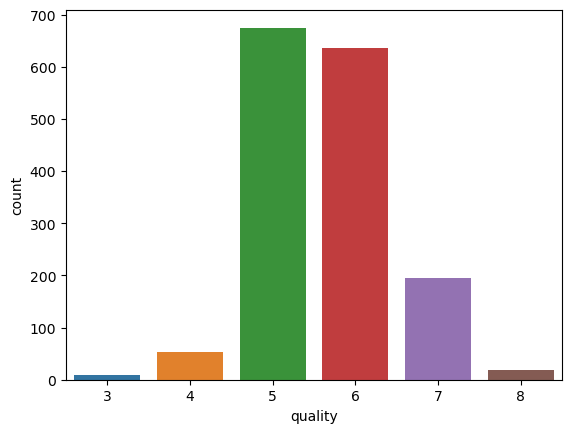

In [36]:
sns.countplot(x='quality', data=data)